In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from wordcloud import WordCloud

nltk.download('stopwords')

plt.style.use('default')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruslanmukhamedvaleev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')
print("Dataset shape:", dataset.shape)
print("\nFirst few rows:")
print(dataset.head())

Dataset shape: (5572, 5)

First few rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = [ps.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

In [10]:
corpus = []
for message in dataset['v2'].values:
    corpus.append(preprocess_text(message))

vectorizer = CountVectorizer(max_features=2000)

X = vectorizer.fit_transform(corpus).toarray()
y = (dataset['v1'] == 'spam').astype(int)

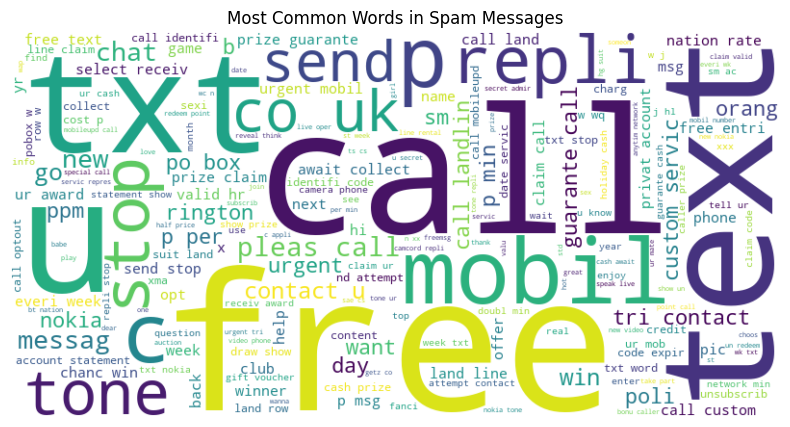

In [11]:
spam_messages = ' '.join([corpus[i] for i in range(len(corpus)) if y[i] == 1])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Spam Messages')
plt.show()

Model Accuracy: 84.66%


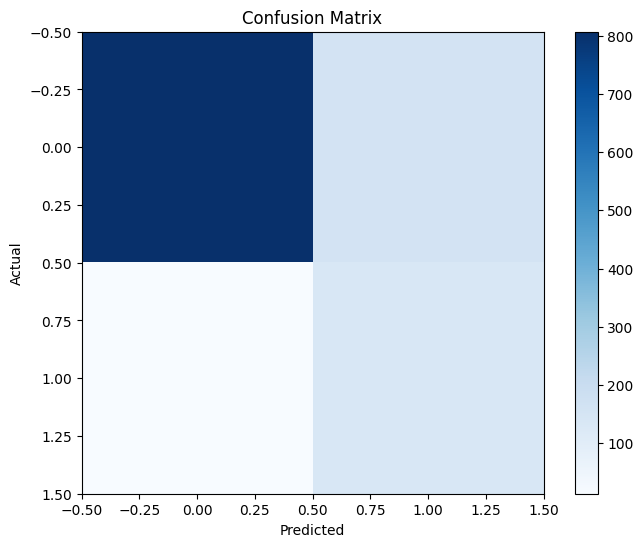

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

classifier = GaussianNB()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
def predict_spam(message):
    processed_message = preprocess_text(message)
    message_vector = vectorizer.transform([processed_message]).toarray()
    prediction = classifier.predict(message_vector)[0]
    probability = classifier.predict_proba(message_vector)[0]
    
    return {
        'is_spam': bool(prediction),
        'confidence': probability[prediction]
    }

test_message = "I'll be a few minutes late today! C U Soon!"
result = predict_spam(test_message)
print(f"Message: {test_message}")
print(f"Prediction: {'Spam' if result['is_spam'] else 'Not Spam'}")
print(f"Confidence: {result['confidence']}") 

Message: I'll be a few minutes late today! C U Soon!
Prediction: Not Spam
Confidence: 1.0
